# Diabetes prediction using tensorflow 
### -Sukrit garg

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Printing a data frame in which the outcome is 1

In [6]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


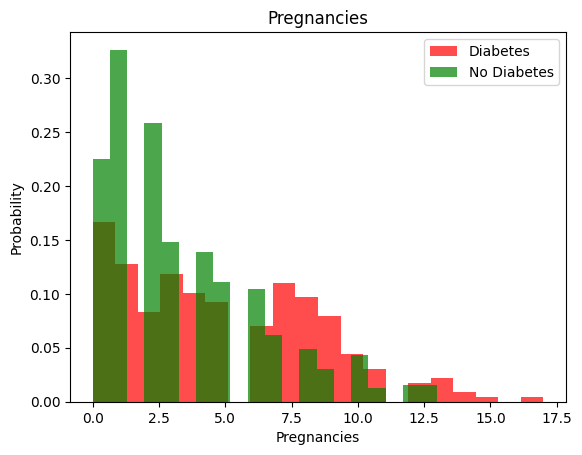

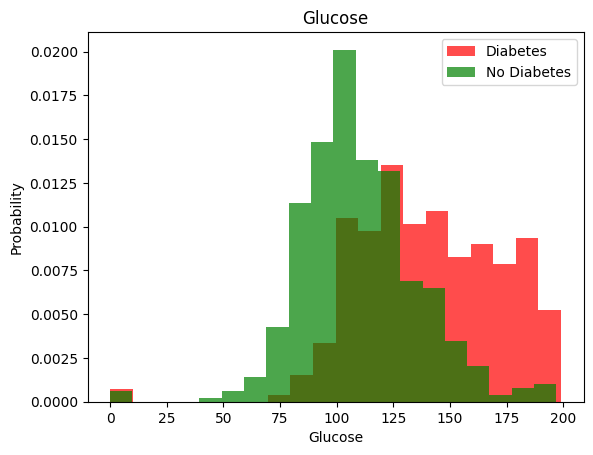

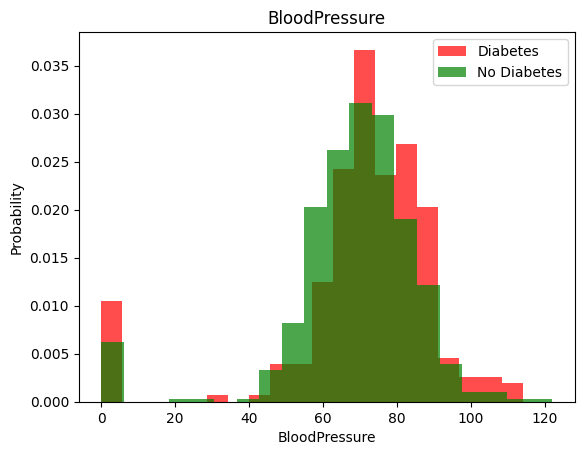

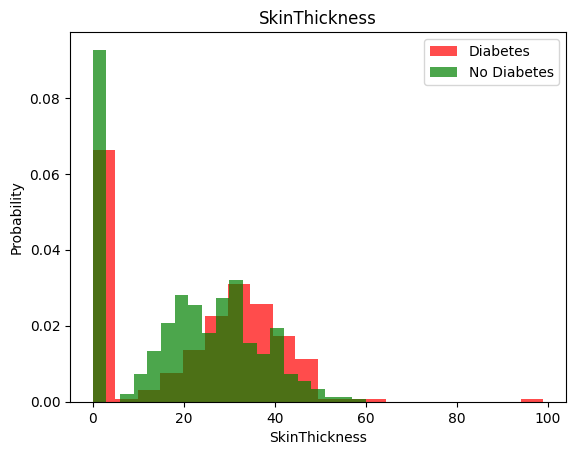

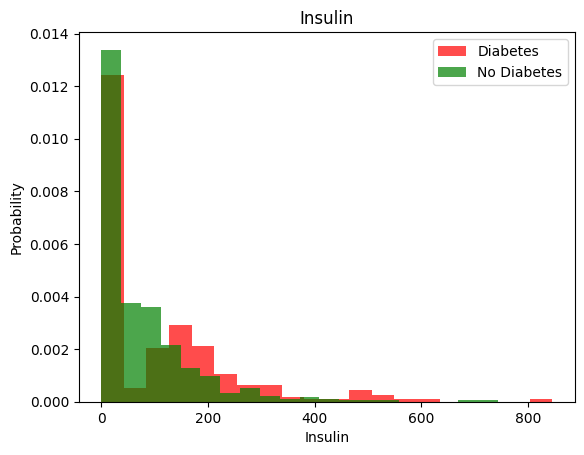

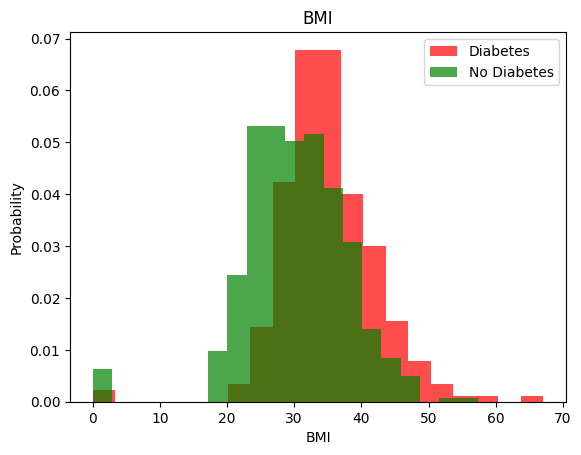

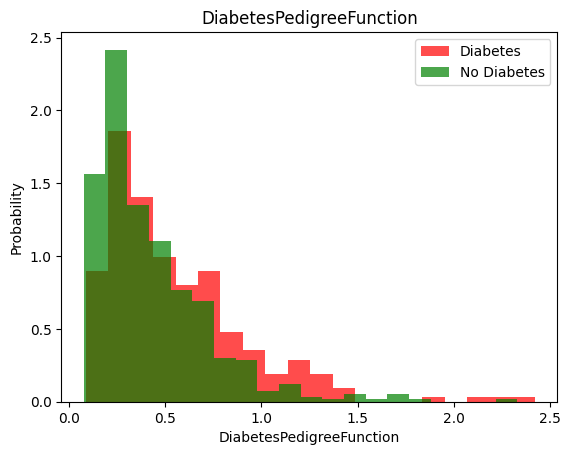

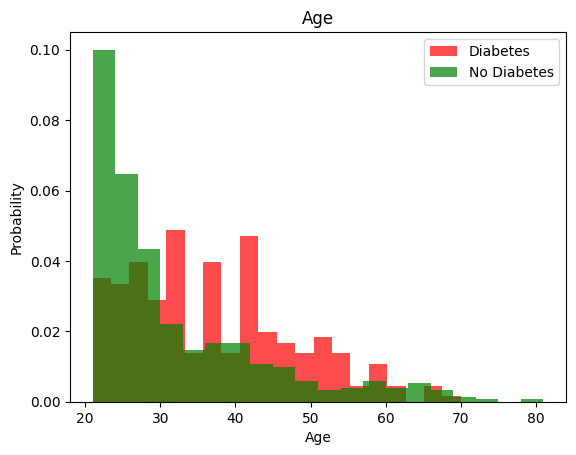

In [23]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='red',label="Diabetes",alpha=0.7,density=True,bins=20)
  plt.hist(df[df['Outcome']==0][label],color='green',label="No Diabetes",alpha=0.7,density=True,bins=20)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend( )
  plt.show()


In [8]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

In [9]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values
m=x.shape

In [10]:
m

(768, 8)

In [11]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [12]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [13]:
X_train , X_temp,Y_train,Y_temp=train_test_split(x,y,test_size=0.4, random_state=0)

In [14]:
X_valid , X_test,Y_valid,Y_test =train_test_split(X_temp,Y_temp,test_size=0.5, random_state=0)

In [15]:
model=tf.keras.Sequential([tf.keras.layers.Dense(16,activation='relu')])
model=tf.keras.Sequential([tf.keras.layers.Dense(16,activation='relu')])
model=tf.keras.Sequential([tf.keras.layers.Dense(1,activation='sigmoid')])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [17]:
model.evaluate(X_train,Y_train)

19/19 [==============================] - 1s 2ms/step - loss: 0.6643 - accuracy: 0.6300


[0.664271354675293, 0.6299999952316284]

In [18]:
model.evaluate(X_valid,Y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6000


[0.6870386004447937, 0.6000000238418579]

In [19]:
model.fit(X_train,Y_train,batch_size=16,epochs=20,validation_data=(X_valid,Y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6563 - accuracy: 0.6283 - val_loss: 0.6699 - val_accuracy: 0.6000
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.6433 - val_loss: 0.6555 - val_accuracy: 0.6100
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6683 - val_loss: 0.6420 - val_accuracy: 0.6200
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.6783 - val_loss: 0.6301 - val_accuracy: 0.6400
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.6900 - val_loss: 0.6197 - val_accuracy: 0.6650
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7000 - val_loss: 0.6103 - val_accuracy: 0.6800
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.6983 - val_loss: 0.6010 - val_accuracy: 0.6850
Epoch 8/20
38/38 [==

In [20]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])


(500, 500)

In [21]:
model.evaluate(X_test,Y_test)

1/7 [===>..........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.8125

7/7 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7550


[0.5343959331512451, 0.7549999952316284]

In [22]:
example_data = np.array([[0.15, 0.7, 0.5, 0.4, 0.6, 0.3, 0.7, 0.2],])
predictions = model.predict(example_data)
print(predictions)
if predictions[0][0] > 0.5:
    print("The person is predicted to have diabetes.")
else:
    print("The person is predicted to not have diabetes.")

1/1 [==============================] - 0s 115ms/step
[[0.6652588]]
The person is predicted to have diabetes.
